## Import the Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB


import warnings
warnings.filterwarnings('ignore')

## Function to split the data to get the First 80 % as train set and the last 20 % as test set

In [2]:
def percent_split(X, Y , percent):
    subset_size = int(len(X) * (percent/100))
    x_train = X[:subset_size]
    y_train = Y[:subset_size]
    x_test = X[subset_size:]
    y_test = Y[subset_size:]
    return x_train, x_test, y_train, y_test

## Function to randomly split the data as 80 % as trainset and 20 % as test set

In [3]:
def split_data(x , y , train_size) :
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = train_size , shuffle = True , random_state = 42)
    return X_train, X_test, y_train, y_test

## Function to split the first 80 % train sets to 4 equal sets with 25 % of the 80 % and return a list of dataframes contains the 4 equally sizes dataframes

In [4]:
def split_df_4_equal_ordered_sets(x_train , y_train , sets_num):
    X_subsets = np.array_split(x_train, sets_num)
    Y_subsets = np.array_split(y_train, sets_num)
    return X_subsets , Y_subsets

## Function to plot the confusion matrix as heatmap

In [5]:
def confusion_mx (y_test,y_pred,label):
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix {label}',size= 10)
    plt.show()

## Function to print the accuracy of the model 

In [6]:
def get_accuracy(y_test , y_pred):
    result = accuracy_score(y_test,y_pred) * 100
    return result

## Function takes the train and test sets and fit the Gaussian Naive Bayes model and print the accuracy and plot the confusion matrix for the model 

In [7]:
def GNB(x_train, x_test, y_train, y_test):
    gaussian_nb = GaussianNB()
    gaussian_nb.fit(x_train, y_train)
    gaussian_nb_pred = gaussian_nb.predict(x_test)
    print("the Gaussian Accuracy : " , get_accuracy(y_test , gaussian_nb_pred))
    confusion_mx(y_test , gaussian_nb_pred , "gaussian_nb_pred")

## Function takes the train and test sets and fit the Multinomial Naive Bayes model and print the accuracy and plot the confusion matrix for the model 

In [8]:
def MNB(x_train, x_test, y_train, y_test):
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(x_train, y_train)
    multinomial_nb_pred = multinomial_nb.predict(x_test)
    print("the Multinomial Accuracy : " , get_accuracy(y_test , multinomial_nb_pred))
    confusion_mx(y_test , multinomial_nb_pred , "multinomial_nb_pred")

## Function takes the train and test sets and fit the Bernoulli Naive Bayes model and print the accuracy , classification report and plot the confusion matrix for the model 

In [9]:
def BNB(x_train, x_test, y_train, y_test):
    BNB = BernoulliNB()
    BNB.fit(x_train , y_train)
    bernoulli_nb_pred = BNB.predict(x_test)
    print("the Bernoulli Accuracy : " , get_accuracy(y_test , bernoulli_nb_pred))
    confusion_mx(y_test , bernoulli_nb_pred , "bernoulli_nb_pred")
    print(classification_report(y_test, bernoulli_nb_pred))

## Function takes the train and test sets then split these sets as 4 equal and ordered sets with 25 % then fits each single set in the Bernoulli model and get the result by testing on the test set then plot the final 4 results as bar plot 

In [10]:
def multiple_BNB(x_train, x_test, y_train, y_test):
    results_list = []
    x_list = ["First Quarter " , "Second Quarter" , "Third Quarter" , "Fourth Quarter"]
    BNB = BernoulliNB()
    X_subsets , Y_subsets = split_df_4_equal_ordered_sets(x_train , y_train , 4)
    for subset_x , subset_y in zip(X_subsets , Y_subsets) :
        print("\nTRAINING :\n" , subset_y.value_counts() , "\n")
        print("\nTESTING :\n" , y_test.value_counts() , "\n")
        BNB.fit(subset_x , subset_y)
        pred = BNB.predict(x_test)
        result = get_accuracy(y_test , pred)
        print(f"The Accuracy : " , result)
        print("________________________________________")

        results_list.append(result)
    plt.bar( x_list, results_list )

### Read the data from the URL

In [11]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
df = pd.read_csv(url, header=None)

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### Split the data to X and Y

In [13]:
X = df.iloc[:, :-1]
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [14]:
Y = df.iloc[: ,-1]
Y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: 57, Length: 4601, dtype: int64

## Part 2 - a)
### Split the A and Y to ordered 80 % train set and 20 % test set 

In [15]:
first_80_x_train, last_20_x_test, first_80_y_train, last_20_y_test = percent_split(X,Y,80)

In [16]:
print(first_80_x_train.shape)
print(last_20_x_test.shape)
print(first_80_y_train.shape)
print(last_20_y_test.shape)

(3680, 57)
(921, 57)
(3680,)
(921,)


### Fit the first ordered 80 % train sets in the Gaussian NB Classifier, predict the X test , print the accuacy comparing between predict set and Y set and plot the confusion matrix  

the Gaussian Accuracy :  61.78067318132465


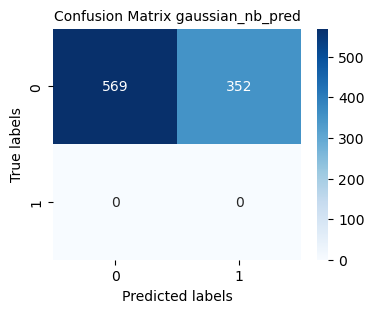

In [17]:
GNB(first_80_x_train, last_20_x_test, first_80_y_train, last_20_y_test)

### Fit the first ordered 80 % train sets in the Multinomial NB Classifier, predict the X test , print the accuacy comparing between predict set and Y set and plot the confusion matrix  

the Multinomial Accuracy :  72.31270358306189


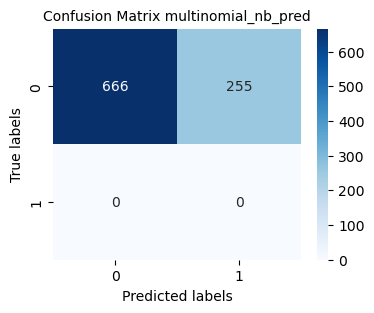

In [18]:
MNB(first_80_x_train, last_20_x_test, first_80_y_train, last_20_y_test)

## Part 2 - b)
### Split the X and Y to random 80 % train and 20 % test sets 

In [19]:
x_train, x_test, y_train, y_test = split_data(X , Y , 0.8)

### Fit the random 80 % train sets in the Gaussian NB Classifier, predict the X test , print the accuacy comparing between predict set and Y test and plot the confusion matrix  

the Gaussian Accuracy :  82.08469055374593


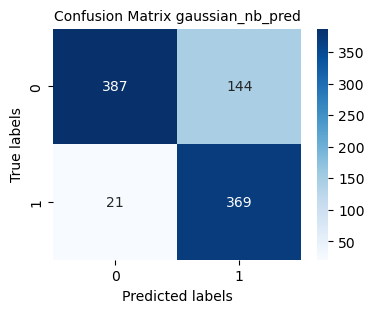

In [20]:
GNB(x_train, x_test, y_train, y_test)

### Fit the random 80 % train sets in the Multinomial NB Classifier, predict the X test , print the accuacy comparing between predict set and Y test and plot the confusion matrix  

the Multinomial Accuracy :  78.61020629750271


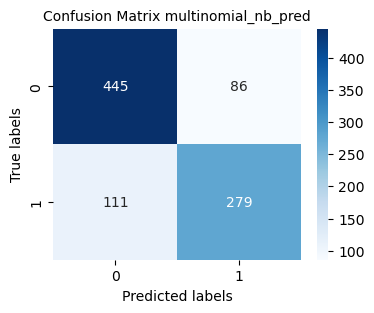

In [21]:
MNB(x_train, x_test, y_train, y_test)

## Part 2 - c)
### Fit the random 80 % train sets in the Bernoulli NB Classifier, predict the X test , print the accuacy comparing between predict set and Y test, the classification report and plot the confusion matrix  

the Bernoulli Accuracy :  88.05646036916394


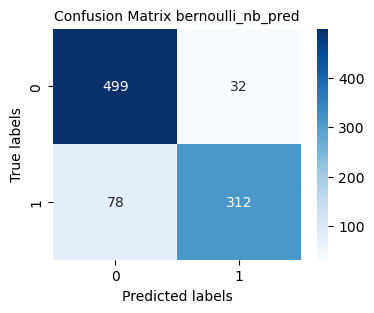

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       531
           1       0.91      0.80      0.85       390

    accuracy                           0.88       921
   macro avg       0.89      0.87      0.88       921
weighted avg       0.88      0.88      0.88       921



In [22]:
BNB(x_train, x_test, y_train, y_test)

## Part 2 - d)
### Split the ordered first 80 % train sets into 4 equal 25 % sets
### Fit each 25 % train sets in the Bernoulli NB Classifier, predict the X test , print the accuacy comparing between predict set and Y test then bar plot the final 4 results to visualiza the accuracy


TRAINING :
 1    920
Name: 57, dtype: int64 


TESTING :
 0    921
Name: 57, dtype: int64 

The Accuracy :  0.0
________________________________________

TRAINING :
 1    893
0     27
Name: 57, dtype: int64 


TESTING :
 0    921
Name: 57, dtype: int64 

The Accuracy :  64.38653637350706
________________________________________

TRAINING :
 0    920
Name: 57, dtype: int64 


TESTING :
 0    921
Name: 57, dtype: int64 

The Accuracy :  100.0
________________________________________

TRAINING :
 0    920
Name: 57, dtype: int64 


TESTING :
 0    921
Name: 57, dtype: int64 

The Accuracy :  100.0
________________________________________


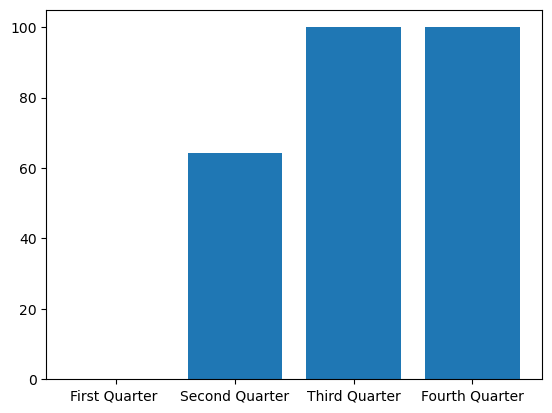

In [23]:
multiple_BNB(first_80_x_train, last_20_x_test, first_80_y_train, last_20_y_test)